# Testing Regularization on CIFAR100 with LeNet

## Imports and data loading

In [1]:
import torch
import jupyter_black

from torchsummary import summary

from data_generators import data_loader_CIFAR100_32_32
from model_classes import LeNet
from tools import plot_results, plot_reg_results, train

jupyter_black.load()

c:\Users\aslak\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading CIFAR100 dataset
in_channels = 3
train_loader, test_loader = data_loader_CIFAR100_32_32()
summary_model = LeNet(lr=0.01, momentum=0.9, in_channels=in_channels, N_images=100).to(device)
summary(summary_model, (in_channels, 32, 32))

Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                  [-1, 100]           8,500
Total params: 69,656
Trainable params: 69,656
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.27
E

## Hyperparameters

In [5]:
lr = 0.01
momentum = 0.9

## No regularization

In [6]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 20
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(train_loader, test_loader, model, n_epochs)

Epoch: 0
Accuracy of the network on the test images: 1 %
Epoch: 1
Accuracy of the network on the test images: 2 %
Epoch: 2
Accuracy of the network on the test images: 3 %
Epoch: 3
Accuracy of the network on the test images: 3 %
Epoch: 4
Accuracy of the network on the test images: 4 %
Epoch: 5
Accuracy of the network on the test images: 4 %
Epoch: 6
Accuracy of the network on the test images: 4 %
Epoch: 7
Accuracy of the network on the test images: 4 %
Epoch: 8
Accuracy of the network on the test images: 4 %
Epoch: 9
Accuracy of the network on the test images: 4 %
Epoch: 10
Accuracy of the network on the test images: 4 %
Epoch: 11
Accuracy of the network on the test images: 5 %
Epoch: 12
Accuracy of the network on the test images: 5 %
Epoch: 13
Accuracy of the network on the test images: 5 %
Epoch: 14
Accuracy of the network on the test images: 5 %
Epoch: 15
Accuracy of the network on the test images: 5 %
Epoch: 16
Accuracy of the network on the test images: 5 %
Epoch: 17
Accuracy of th

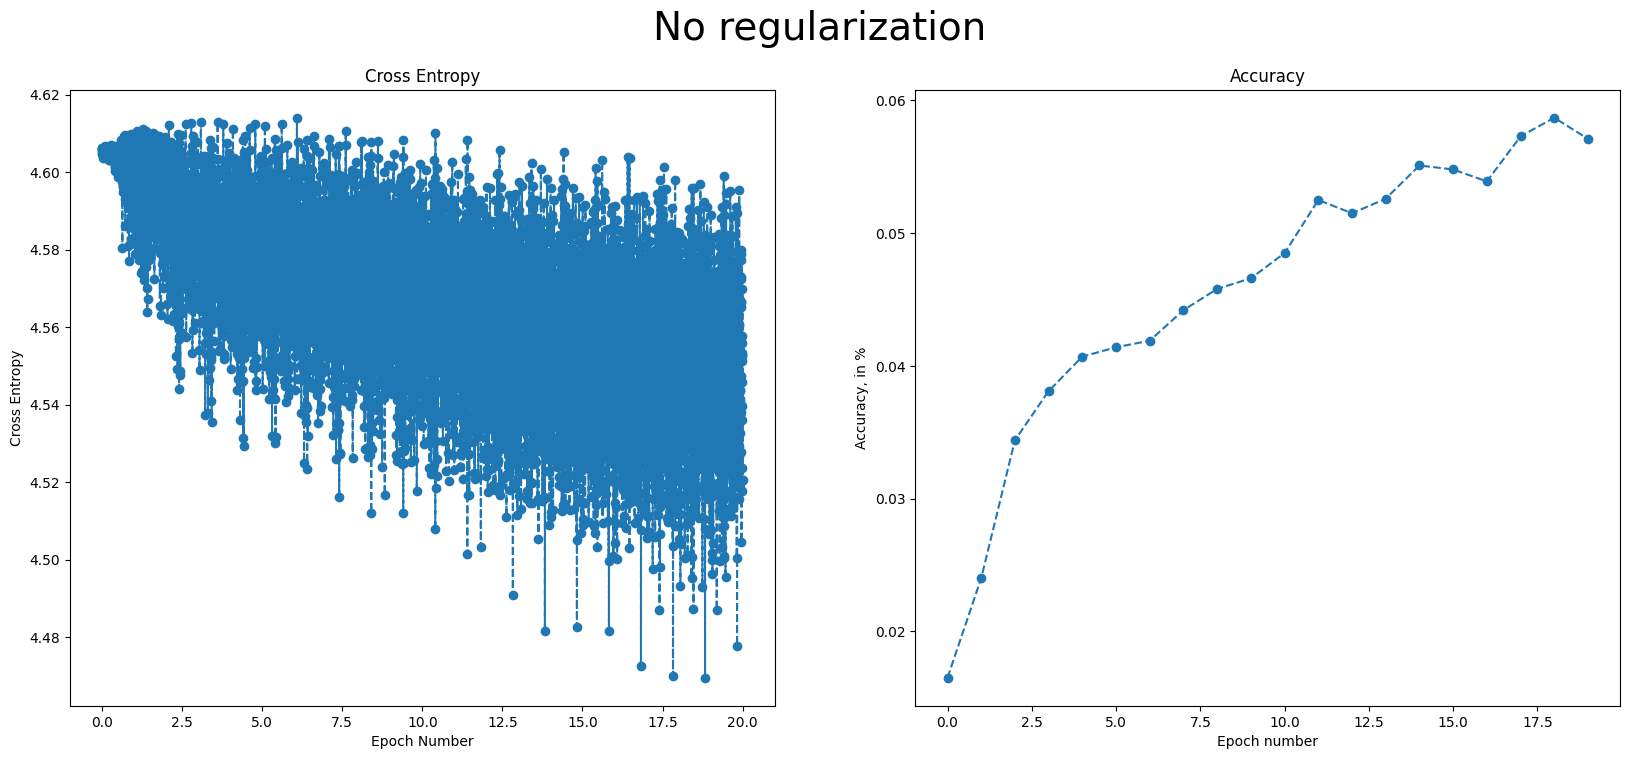

In [7]:
plot_results(epochs, losses, train_accuracies, test_accuracies, title="No regularization")

## L1 Regularization

In [8]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l1=True, l1_lmbd=0.03
)

Epoch: 0
Accuracy of the network on the test images: 1 %
Epoch: 1
Accuracy of the network on the test images: 1 %
Epoch: 2
Accuracy of the network on the test images: 1 %


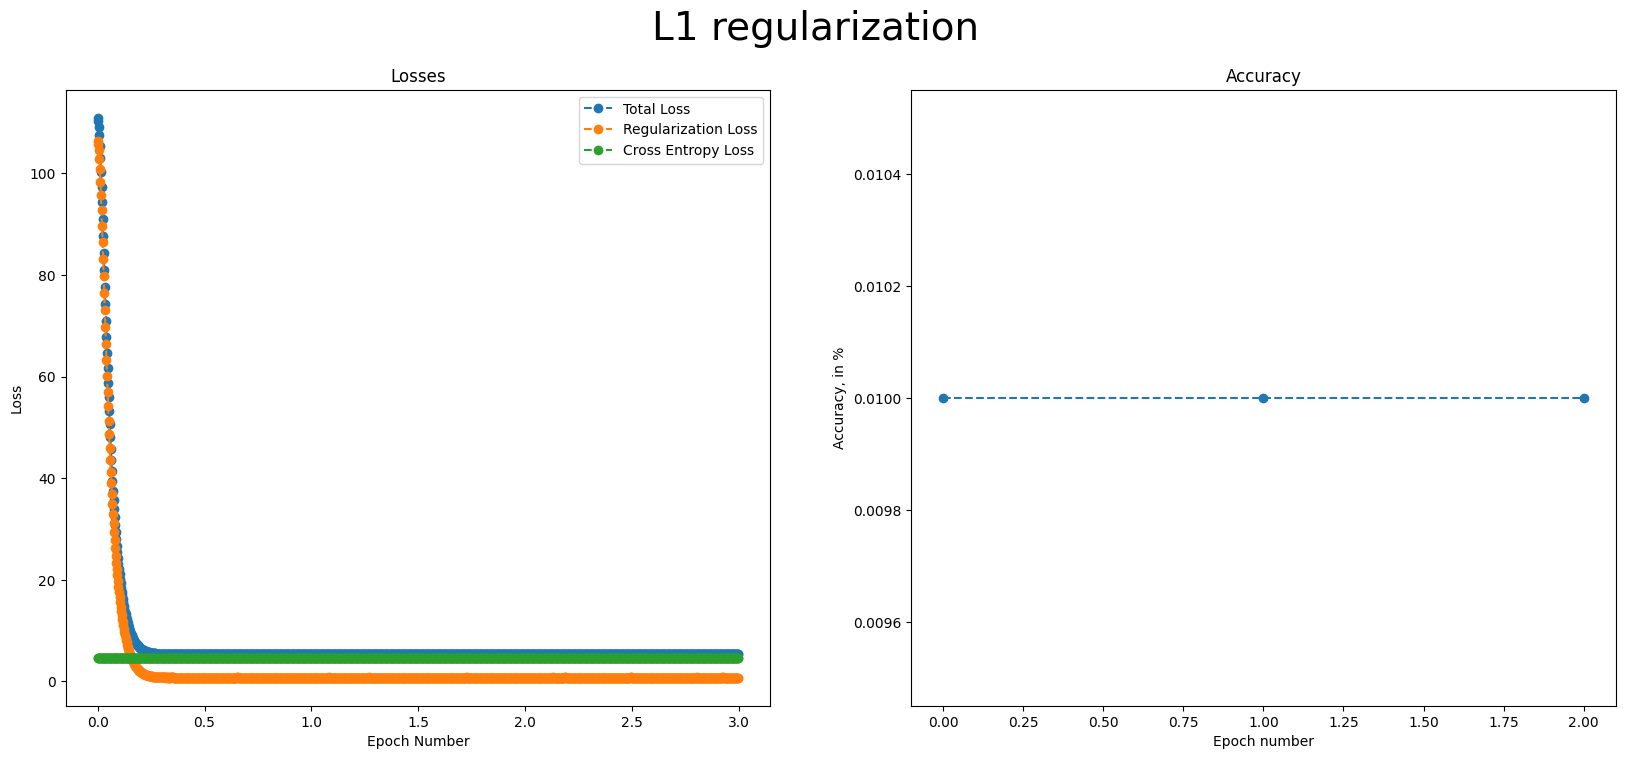

In [9]:
plot_reg_results(epochs, losses, reg_losses, train_accuracies, test_accuracies, title="L1 regularization")

## L2 Regularization

In [8]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l2=True, l2_lmbd=0.0005
)

Epoch: 0
Accuracy of the network on the test images: 35 %
Epoch: 1
Accuracy of the network on the test images: 42 %
Epoch: 2
Accuracy of the network on the test images: 44 %
Epoch: 3
Accuracy of the network on the test images: 46 %
Epoch: 4
Accuracy of the network on the test images: 47 %


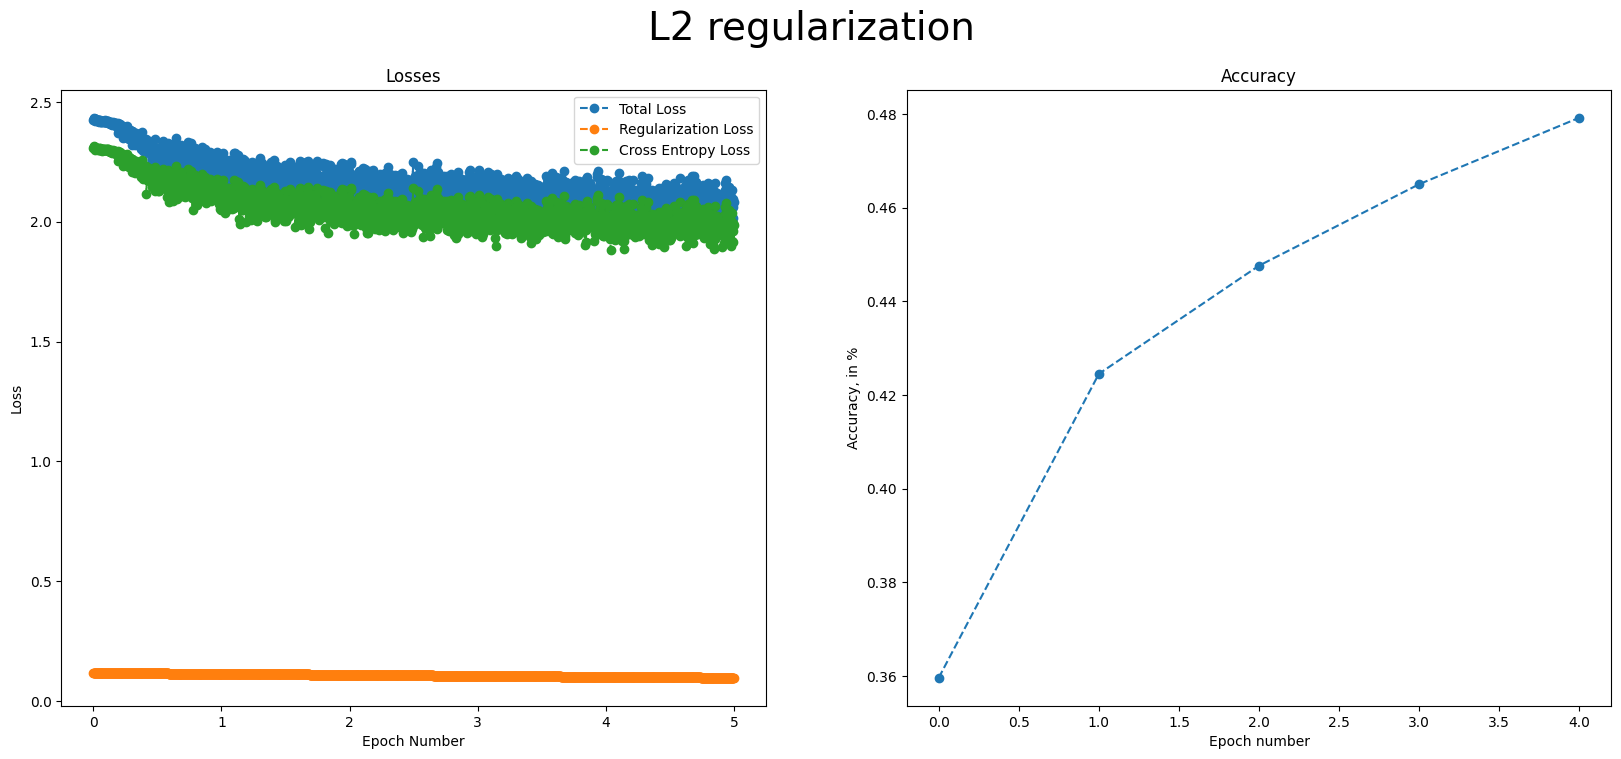

In [9]:
plot_reg_results(epochs, losses, reg_losses, train_accuracies, test_accuracies, title="L2 regularization")

## Elastic Net Regularization (L1 and L2)

In [18]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, l1_lmbd=0.001, l2_lmbd=0.001, l1_l2=True
)

Epoch: 0
Accuracy of the network on the test images: 30 %
Epoch: 1
Accuracy of the network on the test images: 29 %
Epoch: 2
Accuracy of the network on the test images: 31 %
Epoch: 3
Accuracy of the network on the test images: 32 %
Epoch: 4
Accuracy of the network on the test images: 32 %


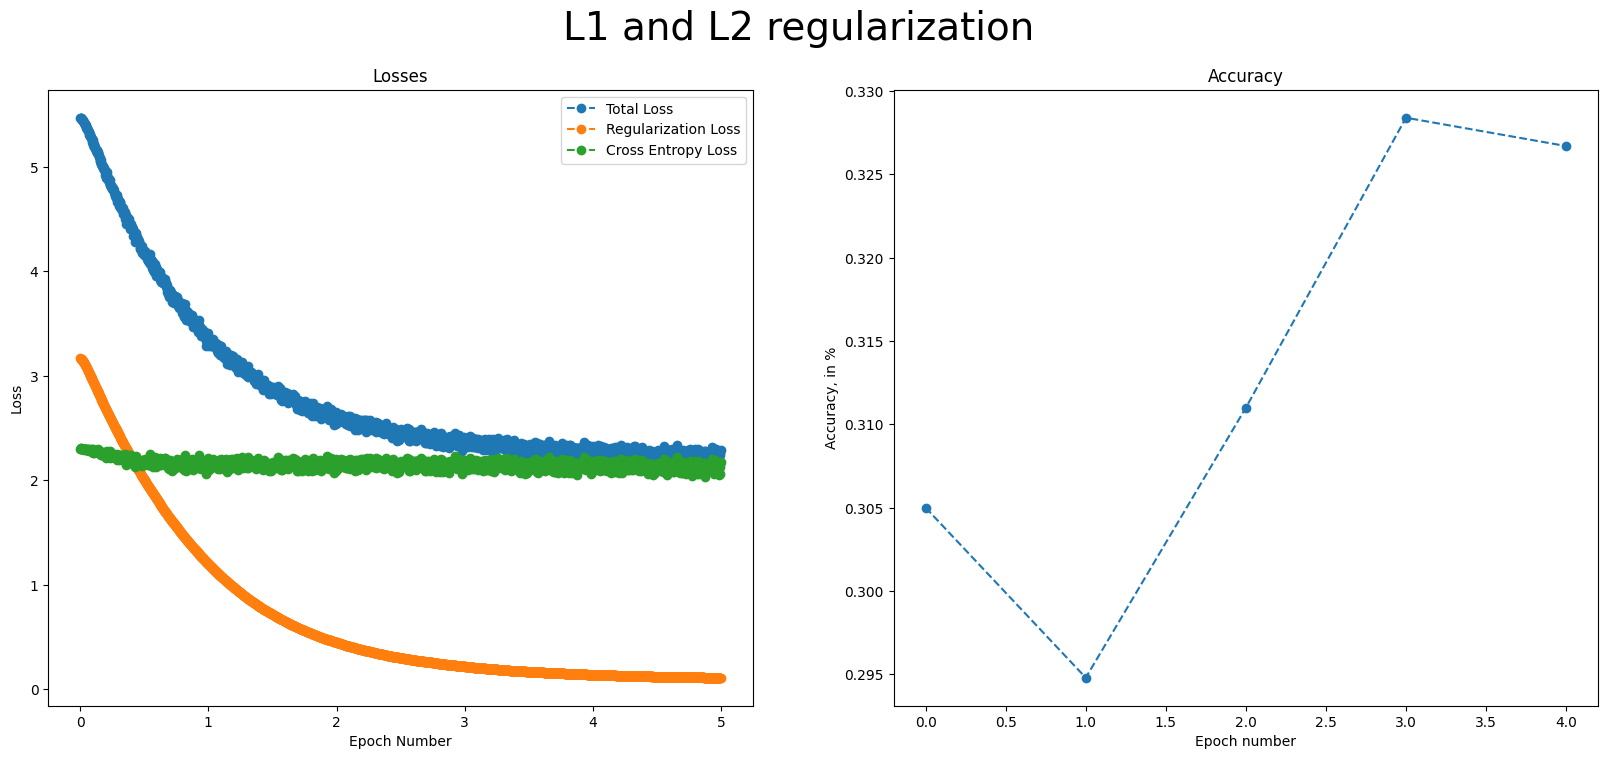

In [19]:
plot_reg_results(
    epochs, losses, reg_losses, train_accuracies, test_accuracies, title="L1 and L2 regularization"
)

## Soft SVB Regularization

In [20]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, soft_svb=True, soft_svb_lmbd=0.01
)

Epoch: 0
Accuracy of the network on the test images: 31 %
Epoch: 1
Accuracy of the network on the test images: 37 %
Epoch: 2
Accuracy of the network on the test images: 39 %
Epoch: 3
Accuracy of the network on the test images: 43 %
Epoch: 4
Accuracy of the network on the test images: 42 %


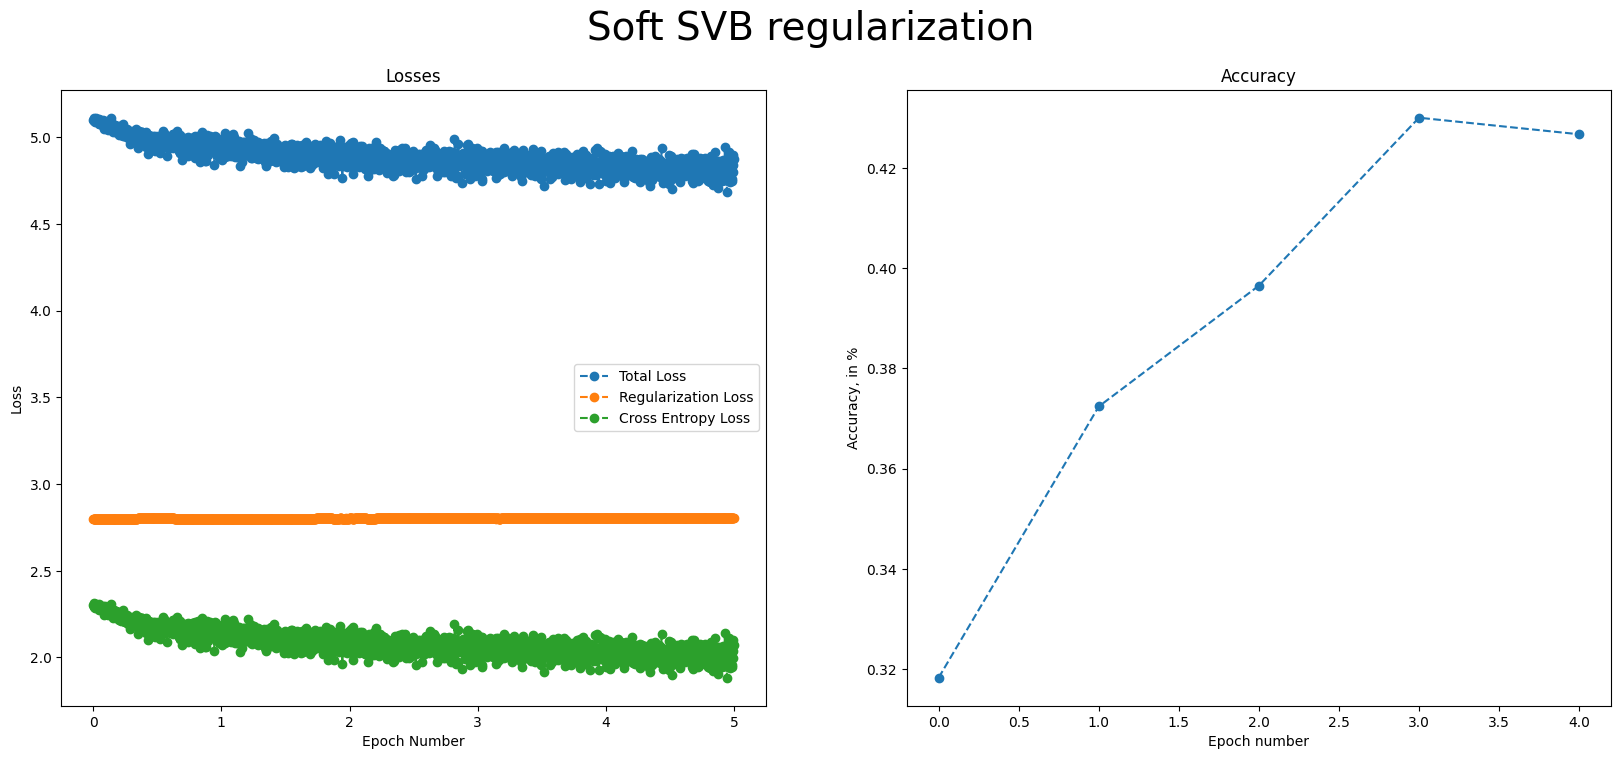

In [21]:
plot_reg_results(
    epochs, losses, reg_losses, train_accuracies, test_accuracies, title="Soft SVB regularization"
)

## Hard SVB Regularization

In [1]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hard_svb=True, hard_svb_lmbd=0.0001
)

NameError: name 'LeNet' is not defined

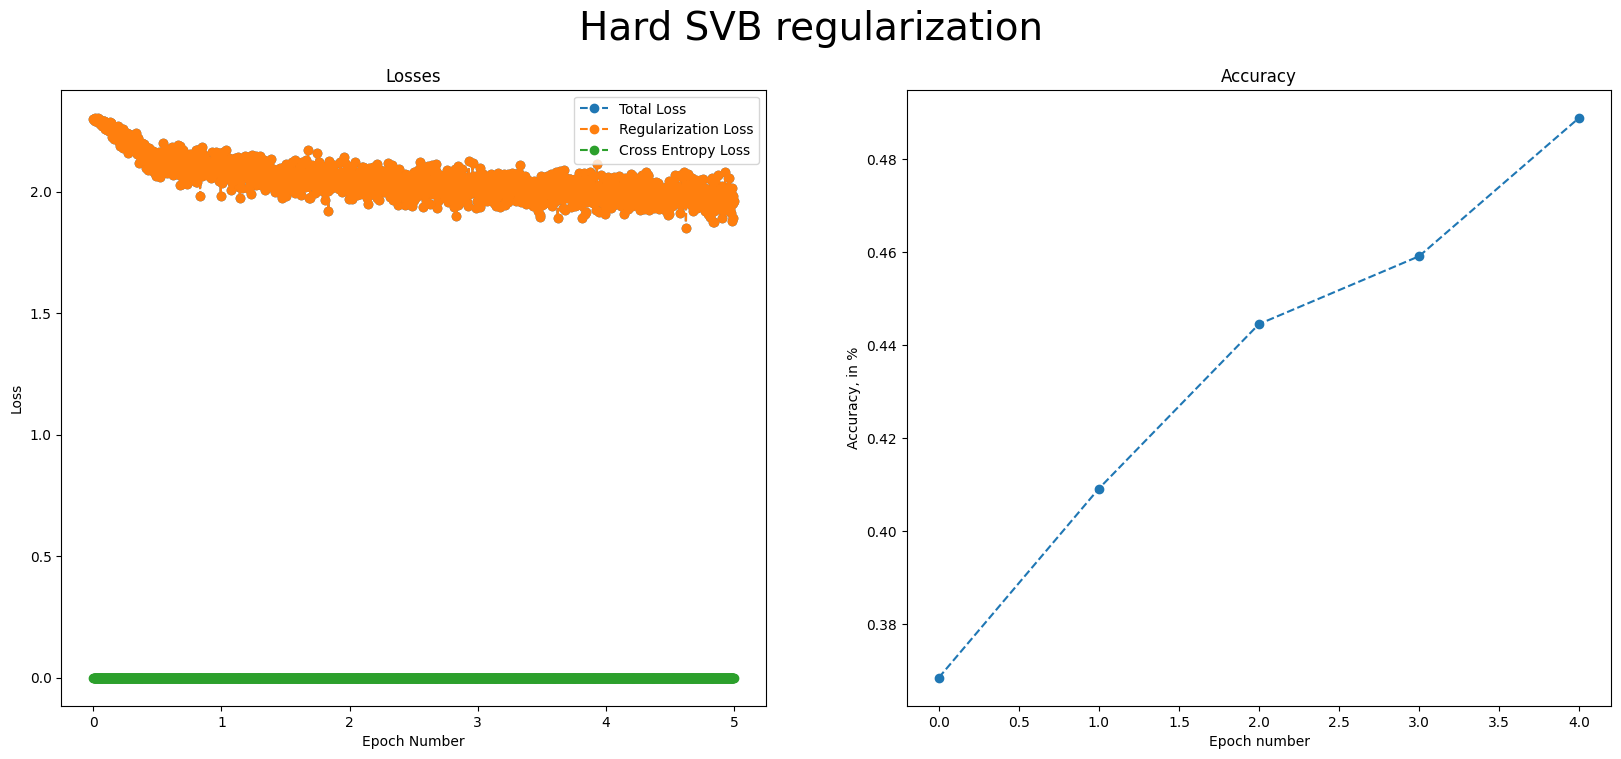

In [23]:
plot_reg_results(
    epochs, losses, reg_losses, train_accuracies, test_accuracies, title="Hard SVB regularization"
)

## Jacobi Regularization

In [24]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, jacobi_reg=True, jacobi_reg_lmbd=10
)

calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 37 %
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 42 %
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 45 %


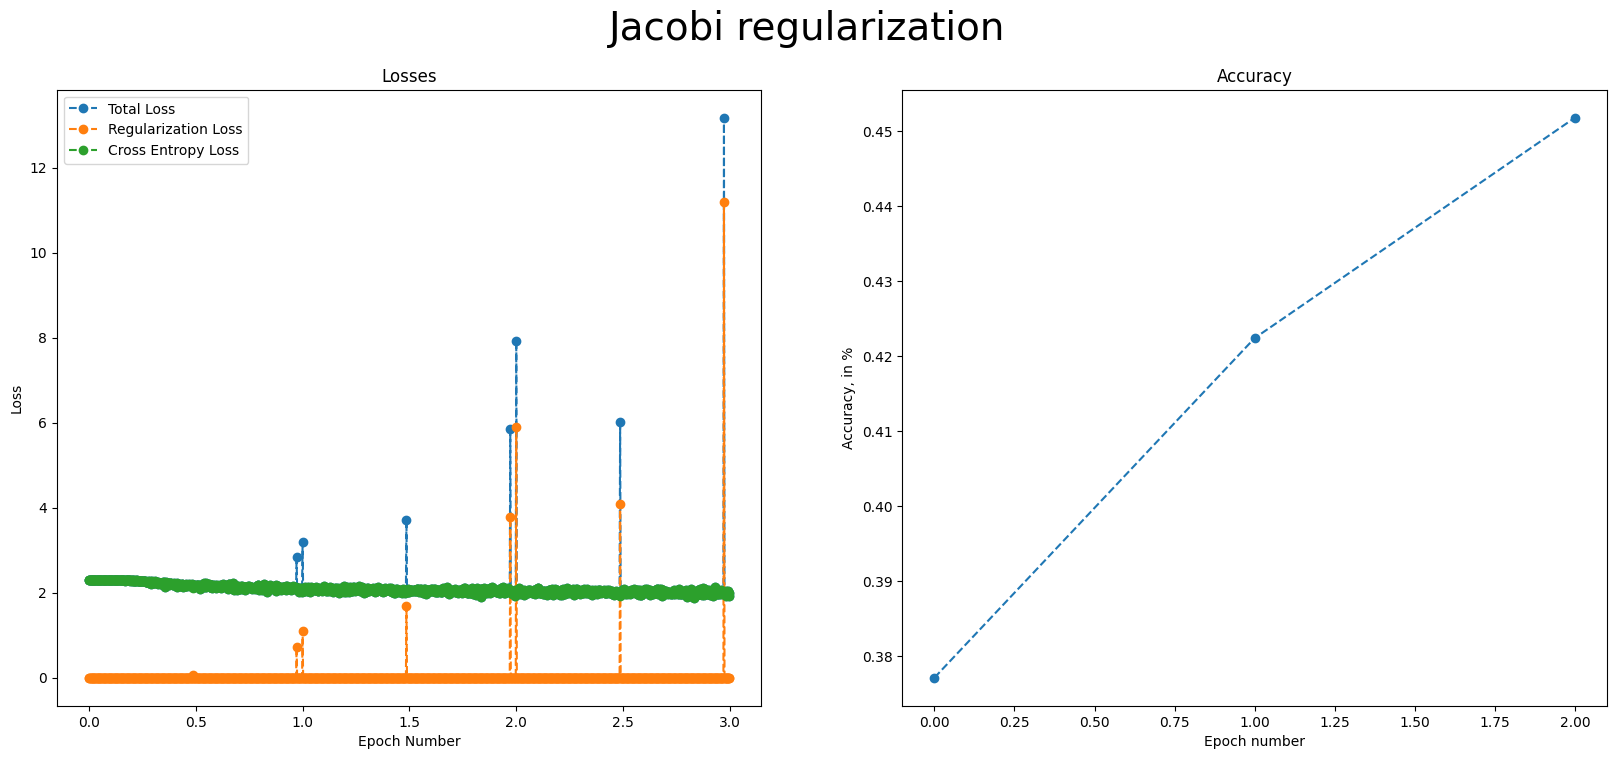

In [25]:
plot_reg_results(epochs, losses, reg_losses, train_accuracies, test_accuracies, title="Jacobi regularization")

## Jacobi Determinant Regularization

In [26]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, jacobi_det_reg=True, jacobi_det_reg_lmbd=0.0001
)

calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 0
Accuracy of the network on the test images: 33 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 1
Accuracy of the network on the test images: 42 %
calculated jacobi
calculated jacobi
calculated jacobi
calculated jacobi
Epoch: 2
Accuracy of the network on the test images: 43 %


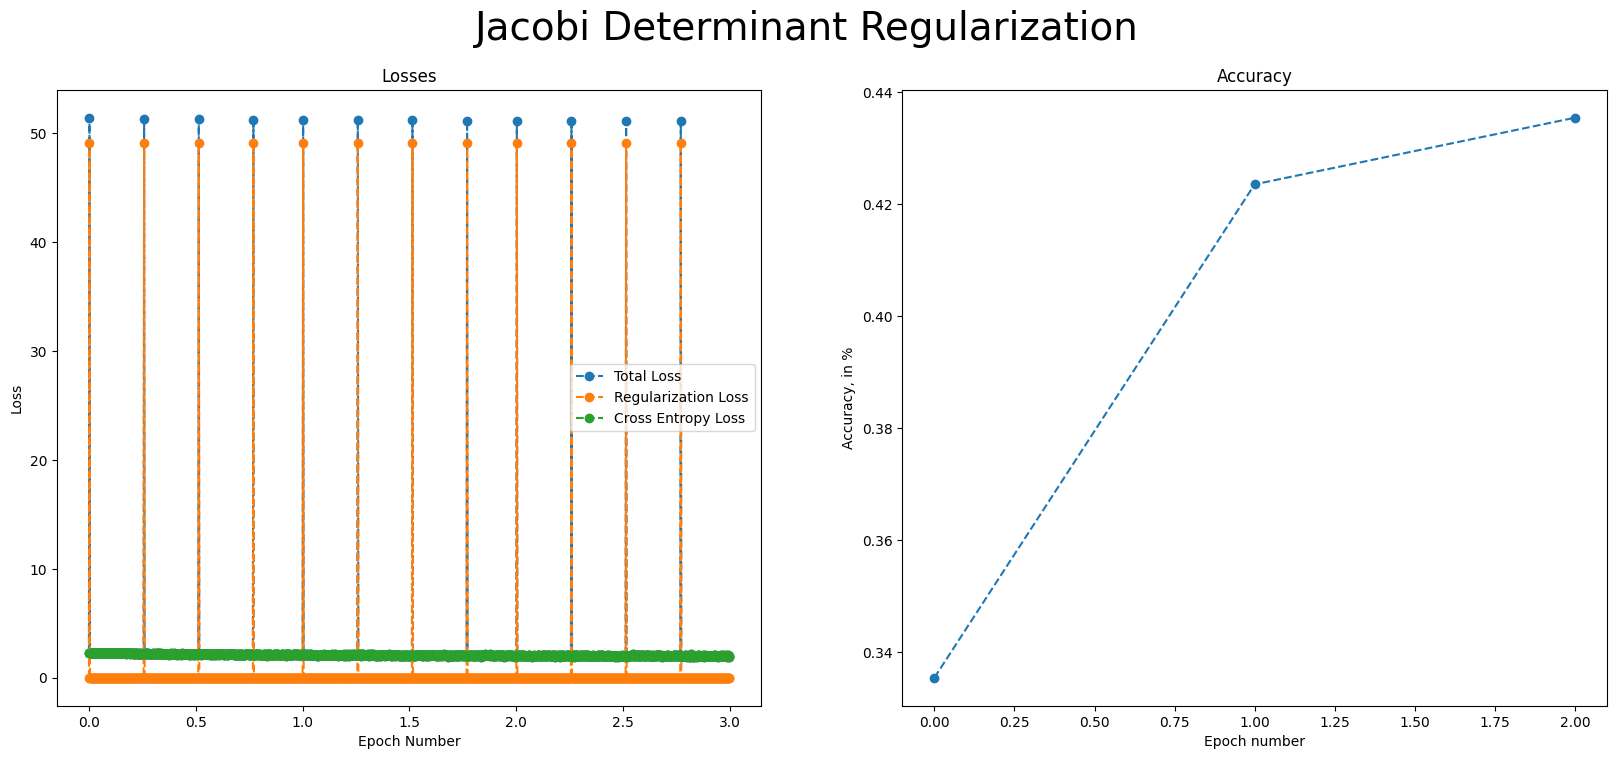

In [27]:
plot_reg_results(
    epochs, losses, reg_losses, train_accuracies, test_accuracies, title="Jacobi Determinant Regularization"
)

## Dropout Regularization

In [9]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, dropout_rate=0.2, N_images=100).to(
    device
)
n_epochs = 10
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(train_loader, test_loader, model, n_epochs)

Epoch: 0
Accuracy of the network on the test images: 13 %
Epoch: 1
Accuracy of the network on the test images: 18 %
Epoch: 2
Accuracy of the network on the test images: 22 %
Epoch: 3
Accuracy of the network on the test images: 24 %
Epoch: 4
Accuracy of the network on the test images: 25 %
Epoch: 5
Accuracy of the network on the test images: 26 %


KeyboardInterrupt: 

In [ ]:
plot_results(epochs, losses, train_accuracies, test_accuracies, title="Dropout Regularization")

## Confidence Penalty Regularization

In [8]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 10
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, conf_penalty=True, conf_penalty_lmbd=0.01
)

Epoch: 0
Accuracy of the network on the test images: 32 %
Epoch: 1
Accuracy of the network on the test images: 36 %
Epoch: 2
Accuracy of the network on the test images: 39 %
Epoch: 3
Accuracy of the network on the test images: 41 %
Epoch: 4
Accuracy of the network on the test images: 40 %
Epoch: 5
Accuracy of the network on the test images: 43 %


KeyboardInterrupt: 

In [ ]:
plot_reg_results(
    epochs, losses, reg_losses, train_accuracies, test_accuracies, title="Confidence Penalty Regularization"
)

## Label Smoothing Regularization

In [22]:
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, label_smoothing=True, label_smoothing_lmbd=0.00001
)

Epoch: 0
Accuracy of the network on the test images: 10 %
Epoch: 1
Accuracy of the network on the test images: 9 %


KeyboardInterrupt: 

In [ ]:
plot_results(epochs, losses, train_accuracies, test_accuracies, title="Label Smoothing Regularization")

## Hessian Regularization (not working)

In [ ]:
"""
model = LeNet(lr=lr, momentum=momentum, in_channels=in_channels, N_images=100).to(device)
n_epochs = 3
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs, hessian_reg=True, hessian_reg_lmbd=0.001
)
"""

In [ ]:
"""plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies, title="Hessian Regularization"
)"""

## Noise Injection (to inputs)

In [ ]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_input=True,
    noise_stddev=0.05,
    N_images=100,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

In [ ]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to inputs)",
)

## Noise Injection (to weights of first convolutional layer)

In [ ]:
model = LeNet(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    noise_inject_weights=True,
    noise_stddev=0.03,
    N_images=100,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model, n_epochs
)

In [ ]:
plot_results(
    epochs,
    losses,
    train_accuracies,
    test_accuracies,
    title="Noise Injection (to weights of first conv layer)",
)